In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
b_cancer = pd.read_csv('Breast_cancer_data.csv')

In [114]:
b_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [115]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [116]:
b_cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
scaler.fit(b_cancer.drop('diagnosis',axis=1))

StandardScaler()

In [120]:
scaled_features = scaler.transform(b_cancer.drop('diagnosis',axis=1))

In [121]:
b_scale = pd.DataFrame(scaled_features,columns=b_cancer.columns[:-1])

In [122]:
b_scale.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372


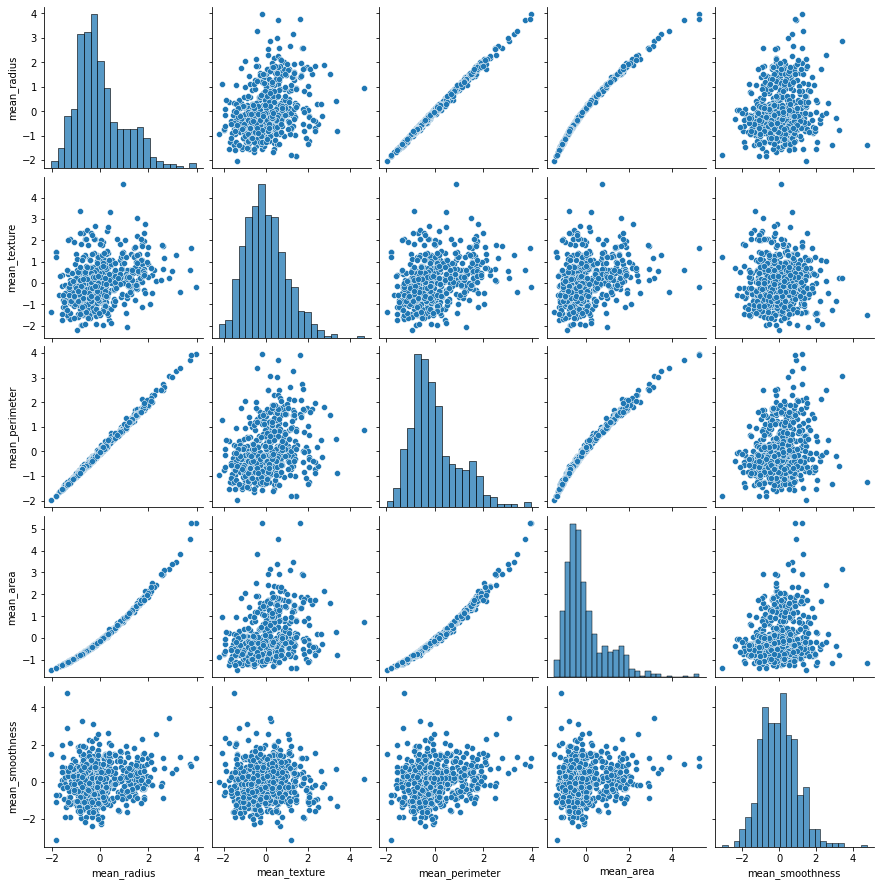

In [123]:
sns.pairplot(b_scale)

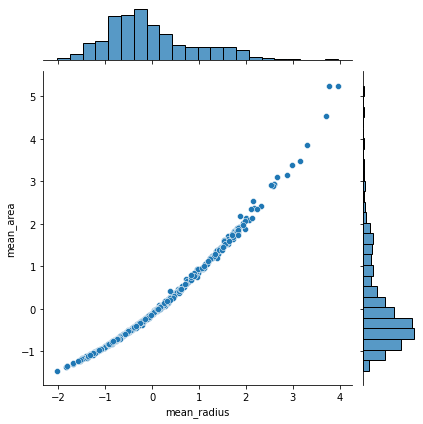

In [124]:
sns.jointplot(x='mean_radius',y='mean_area',data=b_scale)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(b_scale, b_cancer['diagnosis'], test_size=0.33, random_state=42)

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn = KNeighborsClassifier(n_neighbors=1)

In [128]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [129]:
pred = knn.predict(X_test)

In [130]:
from sklearn.metrics import confusion_matrix,classification_report

In [131]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        67
           1       0.93      0.89      0.91       121

    accuracy                           0.89       188
   macro avg       0.88      0.89      0.88       188
weighted avg       0.89      0.89      0.89       188



In [132]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [133]:
knn = KNeighborsClassifier(n_neighbors=7)


In [134]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [135]:
print(X_test.iloc[0])
pred = knn.predict(X_test)
print(pred)

mean_radius       -0.470694
mean_texture      -0.160486
mean_perimeter    -0.448110
mean_area         -0.491999
mean_smoothness    0.234114
Name: 204, dtype: float64
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 0 1]


In [136]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.90        67\n           1       0.95      0.94      0.95       121\n\n    accuracy                           0.93       188\n   macro avg       0.92      0.93      0.92       188\nweighted avg       0.93      0.93      0.93       188\n'

In [137]:
sample = np.array([[-0.470694,-0.160486,-0.448110,-0.491999,0.234114]])
sample = sample.reshape(len(sample),-1)


In [138]:
pred = knn.predict(sample)

In [139]:
print(pred)

[1]


In [140]:
import pickle

In [145]:
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))


In [147]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(sample)
print(result)

[1]


In [148]:
b_scale.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')